In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

### a) Download the Vertebral Column Data Set
- Download the data from given link to the following directory
- Extract the data from the file to a pandas dataframe

In [2]:
df = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep = " ", names=["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "class"])
sum(df['class']=="AB") #sanity-check

210

- Convert the class labels from NO to 0 and AB to 1

In [3]:
df["class_label"] = np.where(df["class"].str.contains("AB"), 1, 0)
sum(df['class_label']==1) #sanity-check

210

### b) Pre-Processing and Exploratory data analysis
#### i) Scatterplots of the independent variables

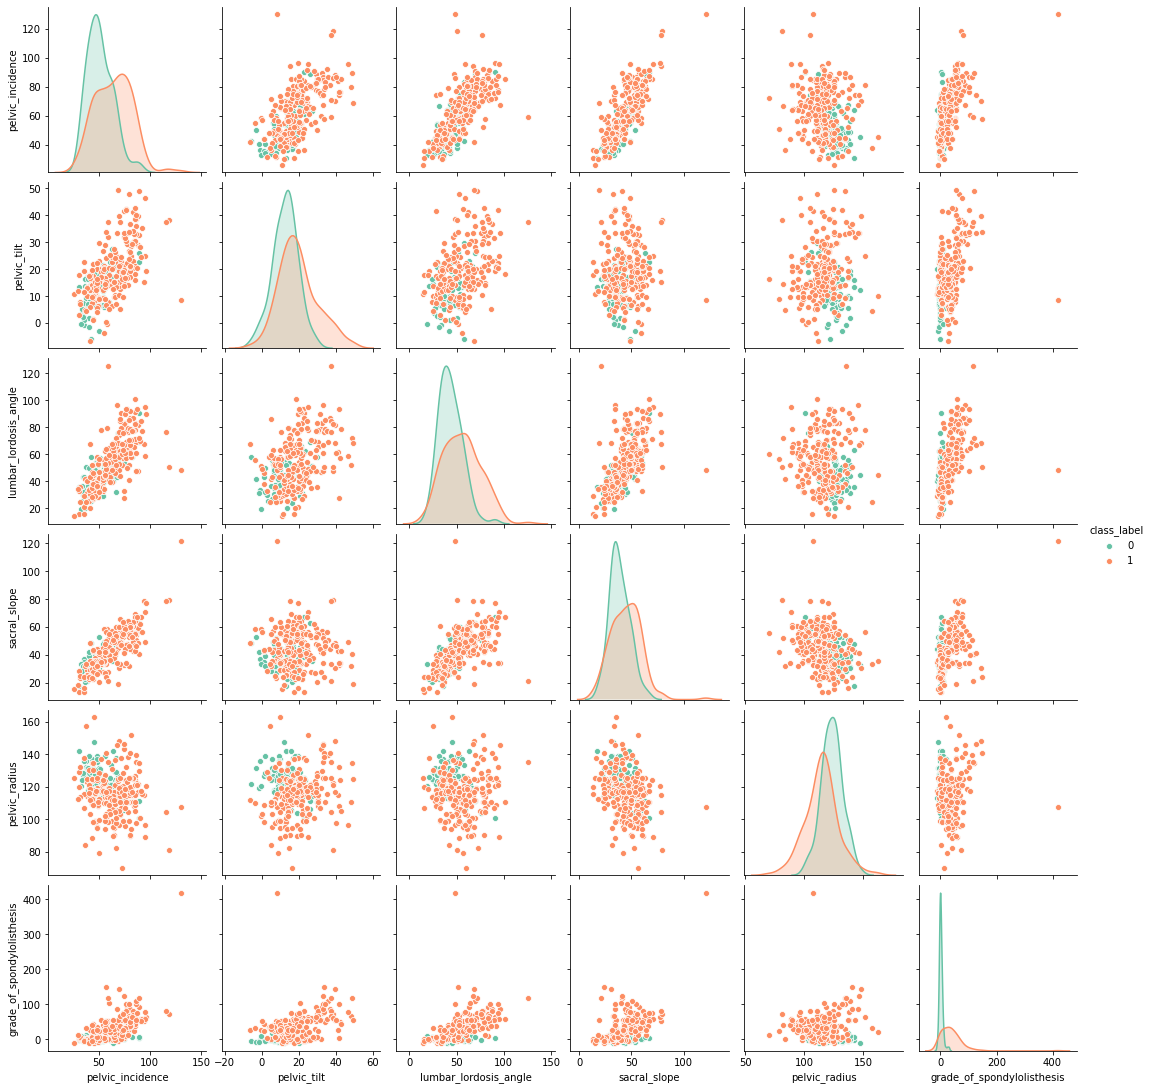

In [4]:
sns.pairplot(df, hue="class_label", palette="Set2")

#### ii) Boxplots for each independent variable

<AxesSubplot:xlabel='class_label', ylabel='grade_of_spondylolisthesis'>

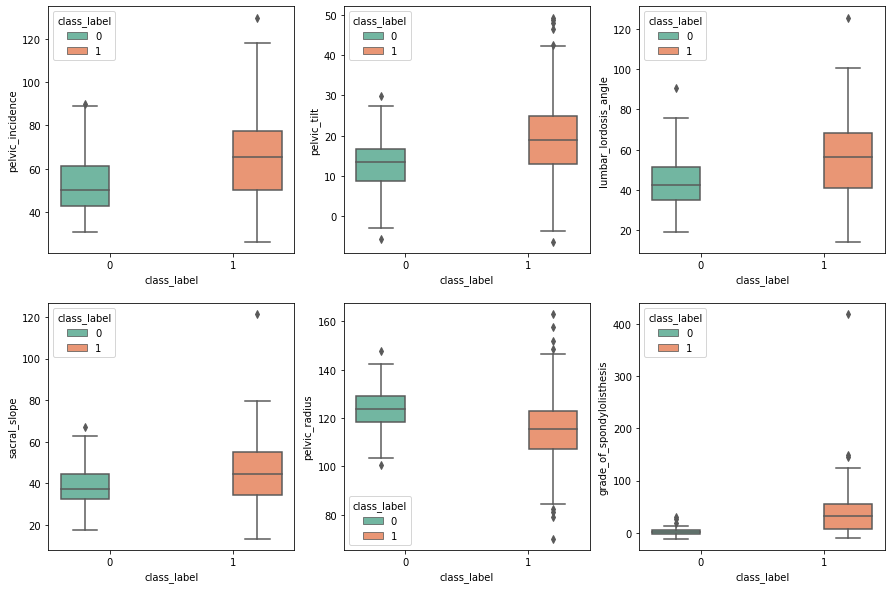

In [5]:
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(15,10))
sns.boxplot(x="class_label", y="pelvic_incidence", data=df, hue="class_label", palette="Set2", ax=axs[0,0])
sns.boxplot(x=df["class_label"], y=df["pelvic_tilt"], hue=df["class_label"], palette="Set2", ax=axs[0,1])
sns.boxplot(x=df["class_label"], y=df["lumbar_lordosis_angle"], hue=df["class_label"], palette="Set2", ax=axs[0,2])
sns.boxplot(x=df["class_label"], y=df["sacral_slope"], hue=df["class_label"], palette="Set2", ax=axs[1,0])
sns.boxplot(x=df["class_label"], y=df["pelvic_radius"], hue=df["class_label"], palette="Set2", ax=axs[1,1])
sns.boxplot(x="class_label", y="grade_of_spondylolisthesis", data=df, hue="class_label", palette="Set2", ax=axs[1,2])

#### iii) Training and test data split

In [6]:
train_1 = df[df['class_label']==1].loc[0:139]
train_0 = df[df['class_label']==0].loc[210:279]
test_1 = df[df['class_label']==1].loc[140:209]
test_0 = df[df['class_label']==0].loc[280:309]
train_frames = [train_1, train_0]
test_frames = [test_1, test_0]
train = pd.concat(train_frames)
test = pd.concat(test_frames)
train_X = train[[
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'grade_of_spondylolisthesis'
]].values

train_Y = np.array(train['class_label'])

test_X = test[[
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'grade_of_spondylolisthesis'
]].values

test_Y = np.array(test['class_label'])

### c) Classification using KNN
#### i) code for k-Nearest Neighbors
- I'm using the built-in KNN classifier from the scikit-learn library.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import math

#### ii. Test all the data in the test database with k nearest neighbors. Plot train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order).

In [8]:
k_range = np.arange(208,0,-3)
test_accuracy = np.empty(len(k_range))
train_accuracy = np.empty(len(k_range))
for i, kval in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=kval)
    knn.fit(train_X, train_Y)
    prediction = knn.predict(test_X)
#     pred_Y = metrics.accuracy_score(test_Y, prediction)
    train_accuracy[i] = knn.score(train_X, train_Y)
    test_accuracy[i] = knn.score(test_X,test_Y)

max_accuracy = np.max(test_accuracy)
k_at_max = 208 - (np.reshape(np.argwhere(test_accuracy == max_accuracy), (1, -1))[0]) * 3
min(1-train_accuracy)

0.0

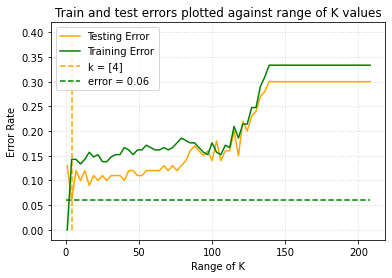

In [9]:
plt.plot(k_range, 1 - test_accuracy, label='Testing Error', color="orange")
plt.plot(k_range, 1 - train_accuracy, label='Training Error', color="green")
plt.vlines(k_at_max, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_max))
plt.hlines(1 - max_accuracy, 0, 208, colors='green', linestyles='dashed', label='error = ' + str(1 - max_accuracy)[:4])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Train and test errors plotted against range of K values')
plt.show()

At k=4, when iterated over k values (the number of neighbors) in the range of 208 to 1, in decrements of 3, the test error rate is minimum (value = 0.060). So the most suitable k among these values is 4. So, setting k = 4 (k*, best value found, the following code finds the confusion matrix, true positive score, true negative score, precision and f1-score for the model.

When k is set to, k = 4 -
Confusion Matrix
[[25  5]
 [ 1 69]]


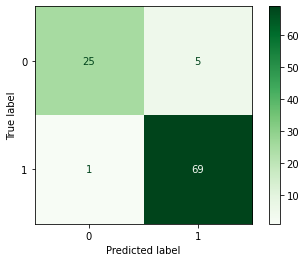

True positive rate: 0.985714
True negative rate: 0.833333
Precision: 0.932432
F1-score: 0.958333


In [10]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(train_X, train_Y)
pred_Y = knn.predict(test_X)
tn, fp, fn, tp = metrics.confusion_matrix(test_Y, pred_Y).ravel()
true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (fp + tn)
precision = tp / (tp + fp)
f1_score = 2 *(precision * true_positive_rate) / (precision + true_positive_rate)

print("When k is set to, k = 4 -")
print("Confusion Matrix")
print(metrics.confusion_matrix(test_Y, pred_Y))
metrics.plot_confusion_matrix(knn, test_X, test_Y, cmap=plt.cm.Greens)
plt.show()
print("True positive rate:", str(true_positive_rate)[:8])
print("True negative rate:", str(true_negative_rate)[:8])
print("Precision:", str(precision)[:8])
print("F1-score:", str(f1_score)[:8])

#### iii. Learning Curve

In [11]:
range_of_N = np.arange(10,211,10)
test_errors_N = np.empty(21)
for i, nval in enumerate(range_of_N):
    test_errors_temp = []
    train_frames_temp = [df[df['class_label']==0].loc[210:210+math.floor(nval/3)], df[df['class_label']==1].loc[0:(nval - math.floor(nval/3))]]
    train_data_temp = pd.concat(train_frames_temp)
    train_X = train_data_temp[[
    'pelvic_incidence',
    'pelvic_tilt',
    'lumbar_lordosis_angle',
    'sacral_slope',
    'pelvic_radius',
    'grade_of_spondylolisthesis'
        ]].values
    train_Y = np.array(train_data_temp['class_label'])
    for kval in np.arange(1, nval, 5):
        knn = KNeighborsClassifier(n_neighbors=kval)
        knn.fit(train_X, train_Y)
        prediction = knn.predict(test_X)
        test_errors_temp.append(1 - knn.score(test_X, test_Y))
    test_errors_N[i] = min(test_errors_temp)

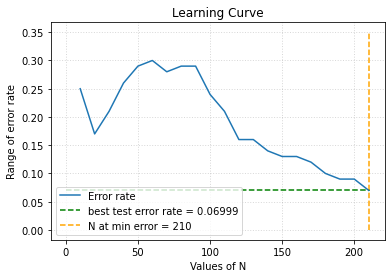

In [12]:
plt.plot(range_of_N, test_errors_N, label="Error rate")
plt.hlines(np.min(test_errors_N), 0, 211, colors='green', label='best test error rate = ' + str(np.min(test_errors_N))[:7], linestyles='dashed')
plt.vlines(math.floor(np.argmin(test_errors_N) * 10 +10), 0, 0.35, colors='orange', label='N at min error = ' + str(math.floor(np.argmin(test_errors_N) * 10 +10)), linestyles='dashed')
plt.xlabel("Values of N")
plt.ylabel("Range of error rate")
plt.legend()
plt.title('Learning Curve')
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.show()

From the learning curve plotted above, we can observe that the best test error rate is *0.069* occuring at the value of *N = 210*. We can also observe that while the error rate increased initially and peaked at *N = 60*, it started to drop eventually to reach the best test error rate of *0.069* at N = 210.

### d) Replace the Eucledean metric
#### i) Minkowski Distance
- Scikit learn's KNN Classifier has a parameter 'metric' to specify which distance metric to use. The default metric is minkowski. 
##### a) Manhattan Distance
- When p = 1, and metric is minkowski, this is equivalent to using manhattan_distance.

In [13]:
k_range_manh = np.arange(1, 197, 5)
test_error_manh = np.empty(len(k_range_manh))
for i, kval in enumerate(k_range_manh):
    knn = KNeighborsClassifier(n_neighbors=kval, p=1)
    knn.fit(train_X, train_Y)
#     pred_Y = knn.predict(test_X)
    test_error_manh[i] = 1 - knn.score(test_X, test_Y)

min_error_manh = np.min(test_error_manh)
k_at_min_manh = (np.reshape(np.argwhere(test_error_manh == min_error_manh), (1, -1))[0]) * 5 + 1
k_at_min_manh

array([ 1, 11, 26])

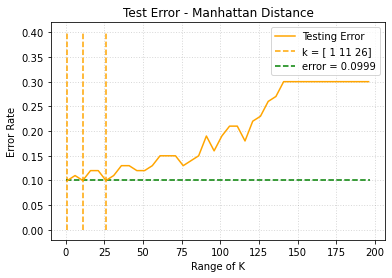

In [14]:
plt.plot(k_range_manh, test_error_manh, label='Testing Error', color="orange")
plt.vlines(k_at_min_manh, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_manh))
plt.hlines(min_error_manh, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_manh)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Manhattan Distance')
plt.show()

We can observe that with Manhattan Distance as metric, the error rate is *0.0999* at k = 1, 11, 26. As error rate is minumum at three values of k, I choose one value for k, *k = 26*.

##### b) with log10(p) ∈ {0.1,0.2,0.3,...,1}. In this case, use the k∗ you found for the Manhattan distance in ??. What is the best log10(p)?

In [15]:
manh_log10p = [10**p for p in np.arange(0.1,1.1,0.1)]
test_error_manh_log10p = np.empty(len(manh_log10p))
for i, pval in enumerate(manh_log10p):
    knn = KNeighborsClassifier(n_neighbors=26, p=pval)
    knn.fit(train_X, train_Y)
#     pred_Y = knn.predict(test_X)
    test_error_manh_log10p[i] = 1 - knn.score(test_X, test_Y)

min_error_manh_log10p = np.min(test_error_manh_log10p)
min_manh_log10p = 10 ** (np.argmin(test_error_manh_log10p) * 0.1 + 0.1)
min_manh_log10p

1.2589254117941673

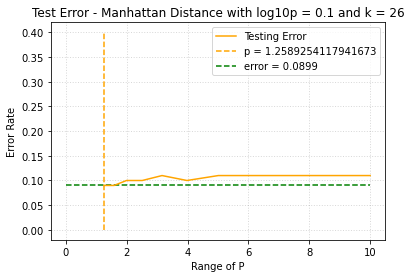

In [16]:
plt.plot(manh_log10p, test_error_manh_log10p, label='Testing Error', color="orange")
plt.vlines(min_manh_log10p, 0, 0.4, colors='orange', linestyles='dashed', label='p = ' + str(min_manh_log10p))
plt.hlines(min_error_manh_log10p, 0, 10, colors='green', linestyles='dashed', label='error = ' + str(min_error_manh_log10p)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of P')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Manhattan Distance with log10p = {} and k = 26'.format(str(math.log(min_manh_log10p, 10))))
plt.show()

The best log10p is obtained when the value of *p = 1.2589*, as computed above.

#### c) Chebyshev Distance with p → ∞

In [17]:
k_range_che = np.arange(1, 197, 5)
test_error_che = np.empty(len(k_range_che))
for i, kval in enumerate(k_range_che):
    knn = KNeighborsClassifier(n_neighbors=kval, metric='chebyshev')
    knn.fit(train_X, train_Y)
#     pred_Y = knn.predict(test_X)
    test_error_che[i] = 1 - knn.score(test_X, test_Y)

min_error_che = np.min(test_error_che)
k_at_min_che = (np.reshape(np.argwhere(test_error_che == min_error_che), (1, -1))[0]) * 5 + 1
k_at_min_che

array([16])

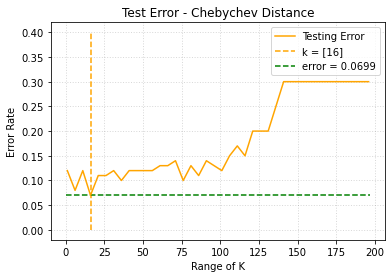

In [18]:
plt.plot(k_range_che, test_error_che, label='Testing Error', color="orange")
plt.vlines(k_at_min_che, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_che))
plt.hlines(min_error_che, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_che)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Chebychev Distance')
plt.show()

With Chebychev distance as metric, when p approached infinity, the lowest error rate of *0.069* is achieved with number of neighbors being *16*.

### ii) Mahalanobis Distance

The following code is to supress the sklearn warning stating "FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.". I passed V, the cov matrix of the training data and sklearn needs either V or VI for computation right now. But sklearn forces the warning anyway. So I'm suppressing this warning using the code below. It doesn't impact the results.

In [19]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [20]:
k_range_mah = np.arange(1, 197, 5)
test_error_mah = np.empty(len(k_range_mah))
for i, kval in enumerate(k_range_mah):
    knn = KNeighborsClassifier(n_neighbors=kval, metric='mahalanobis', metric_params={'V': np.cov(train_X)}, algorithm='brute')
    knn.fit(train_X, train_Y)
    test_error_mah[i] = 1 - knn.score(test_X, test_Y)

min_error_mah = np.min(test_error_mah)
k_at_min_mah = (np.reshape(np.argwhere(test_error_mah == min_error_mah), (1, -1))[0]) * 5 + 1
k_at_min_mah

array([6])

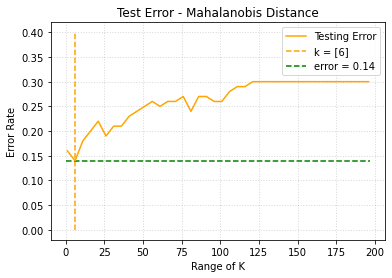

In [21]:
plt.plot(k_range_mah, test_error_mah, label='Testing Error', color="orange")
plt.vlines(k_at_min_mah, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_mah))
plt.hlines(min_error_mah, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_mah)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Mahalanobis Distance')
plt.show()

We can observe that with Mahalanobis distance as metric, we get *k=6* as the best number of neighbors with error rate of *0.14*.

#### Summary of the test errors -

                  Metric  Test Error
0     Manhattan Distance        0.10
1  Minkowski with log10p        0.09
2     Chebyshev Distance        0.07
3   Mahalanobis Distance        0.14


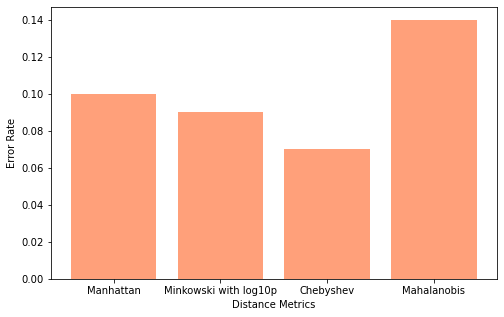

In [22]:
val_dict = {"Metric": ["Manhattan Distance", "Minkowski with log10p", "Chebyshev Distance", "Mahalanobis Distance"], "Test Error": [min_error_manh, min_error_manh_log10p, min_error_che, min_error_mah]}
te_df = pd.DataFrame(val_dict)
print(te_df)
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(["Manhattan", "Minkowski with log10p", "Chebyshev", "Mahalanobis"], [min_error_manh, min_error_manh_log10p, min_error_che, min_error_mah], align='center', color='lightsalmon')
ax.set_ylabel('Error Rate')
ax.set_xlabel('Distance Metrics')
plt.show()


### e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1,6,11,16,...,196}.

- The sklearn library's KNN classifier has a parameter 'weights' which supports the implementation of weighted decision, which is the closer neighbors will have more 'weight' and contribute more to the classification when compared to the points farther. 
- By default, 'weights' parameter takes 'uniform' as its value, where all points in each neighborhood are weighted equally. To get weighted decision, we can set this to 'distance' explicitly. 
- The following cells examine this weighted decision for Euclidian, Manhattan and Chebyshev distances and the corresponding best test errors are reported.

#### Euclidian Distance

In [23]:
k_range_w = np.arange(1, 197, 5)
test_error_w = np.empty(len(k_range_w))
for i, kval in enumerate(k_range_w):
    knn = KNeighborsClassifier(n_neighbors=kval, weights='distance')
    knn.fit(train_X, train_Y)
#     pred_Y = knn.predict(test_X)
    test_error_w[i] = 1 - knn.score(test_X, test_Y)

min_error_w = np.min(test_error_w)
k_at_min_w = (np.reshape(np.argwhere(test_error_w == min_error_w), (1, -1))[0]) * 5 + 1
k_at_min_w

array([6])

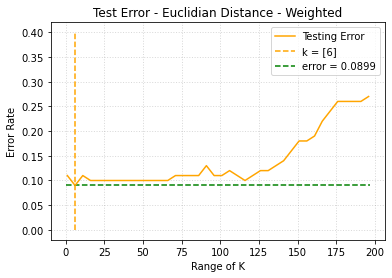

In [24]:
plt.plot(k_range_w, test_error_w, label='Testing Error', color="orange")
plt.vlines(k_at_min_w, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_w))
plt.hlines(min_error_w, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_w)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Euclidian Distance - Weighted')
plt.show()

We can observe that at *k = 6*, we achieve the best error rate of *0.0899* for euclidian distance with weights.

#### Manhattan Distance

In [25]:
k_range_manh_w = np.arange(1, 197, 5)
test_error_manh_w = np.empty(len(k_range_manh_w))
for i, kval in enumerate(k_range_manh_w):
    knn = KNeighborsClassifier(n_neighbors=kval, p=1, weights='distance')
    knn.fit(train_X, train_Y)
    test_error_manh_w[i] = 1 - metrics.accuracy_score(test_Y, knn.predict(test_X))

min_error_manh_w = np.min(test_error_manh_w)
k_at_min_manh_w = (np.reshape(np.argwhere(test_error_manh_w == min_error_manh_w), (1, -1))[0]) * 5 + 1
k_at_min_manh_w

array([ 1,  6, 11, 26, 31, 36, 46, 51])

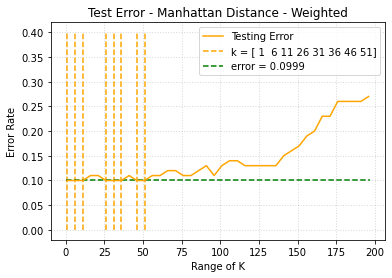

In [26]:
plt.plot(k_range_manh_w, test_error_manh_w, label='Testing Error', color="orange")
plt.vlines(k_at_min_manh_w, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_manh_w))
plt.hlines(min_error_manh_w, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_manh_w)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Manhattan Distance - Weighted')
plt.show()

We can observe that, for manhattan distance with weights, the best test error of *0.0999* is achieved at *k = [1,  6, 11, 26, 31, 36, 46, 51]*.

#### Chebyshev Distance

In [27]:
k_range_che_w = np.arange(1, 197, 5)
test_error_che_w = np.empty(len(k_range_che_w))
for i, kval in enumerate(k_range_che_w):
    knn = KNeighborsClassifier(n_neighbors=kval, metric="chebyshev", weights="distance")
    knn.fit(train_X, train_Y)
    test_error_che_w[i] = 1 - knn.score(test_X, test_Y)

min_error_che_w = np.min(test_error_che_w)
k_at_min_che_w = (np.reshape(np.argwhere(test_error_che_w == min_error_che_w), (1, -1))[0]) * 5 + 1
k_at_min_che_w

array([16])

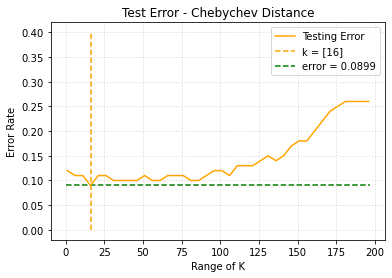

In [28]:
plt.plot(k_range_che_w, test_error_che_w, label='Testing Error', color="orange")
plt.vlines(k_at_min_che_w, 0, 0.4, colors='orange', linestyles='dashed', label='k = ' + str(k_at_min_che_w))
plt.hlines(min_error_che_w, 0, 197, colors='green', linestyles='dashed', label='error = ' + str(min_error_che_w)[:6])
plt.grid(color='grey', linestyle='dotted', linewidth=1,alpha=0.3)
plt.xlabel('Range of K')
plt.ylabel('Error Rate')
plt.legend()
plt.title('Test Error - Chebychev Distance')
plt.show()

We can observe that, for Chebyshev distance with weighted voting, the best test error of *0.0899* is achieved at *k = 16*.

### (f) What is the lowest training error rate you achieved in this homework?

I achieved a lowest training error rate of 0, while training with euclidian distance on the train_X dataset, in this homework.